In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
df = pd.read_csv("iris.csv")

# Features and target
X = df.drop('species', axis=1)
y = df['species']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


K=1, Accuracy=0.98
K=2, Accuracy=0.98
K=3, Accuracy=1.00
K=4, Accuracy=0.98
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00


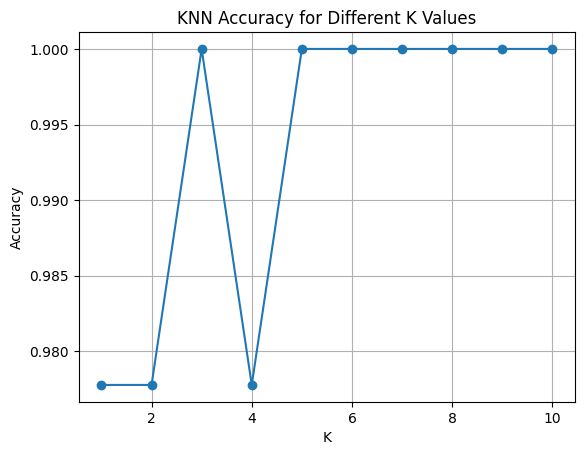

In [4]:
# Try K from 1 to 10
accuracy_list = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    print(f"K={k}, Accuracy={acc:.2f}")

# Plot Accuracy vs. K
plt.plot(range(1, 11), accuracy_list, marker='o')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.grid()
plt.show()


In [5]:
# Choose best K
best_k = accuracy_list.index(max(accuracy_list)) + 1
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Evaluation
print("Best K:", best_k)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Best K: 3
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



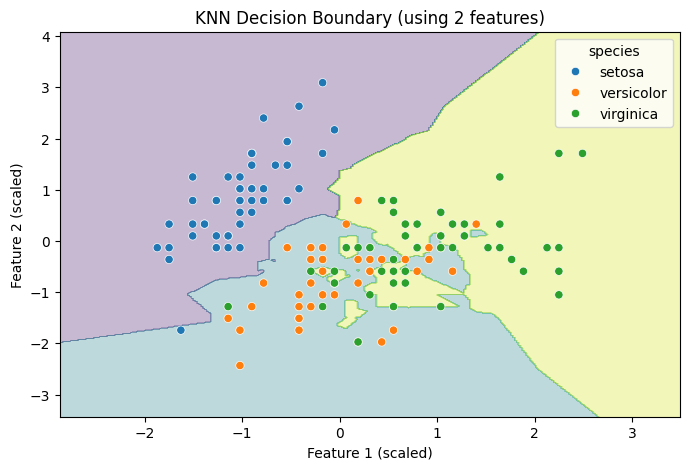

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode labels to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Fit model on 2D data using encoded target
knn_2d.fit(X_train_2d, le.transform(y_train))

# Predict and reshape
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Now plot
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y)
plt.title("KNN Decision Boundary (using 2 features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
